In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hr=pd.read_csv('HR_comma_sep.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


We can see that there are no null values so we can proceed with rest of analysis.

In [5]:
corr_hr=hr.corr()
corr_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


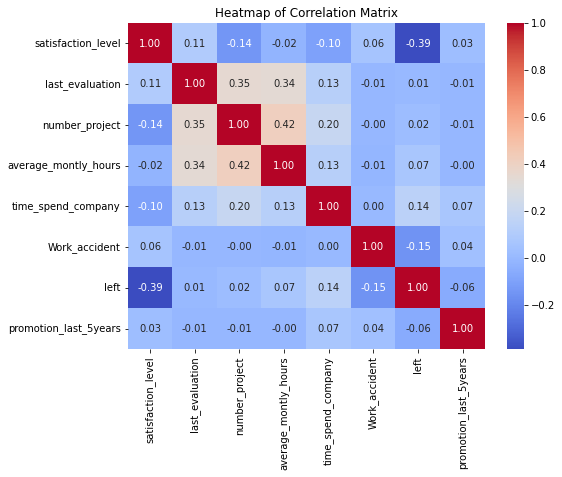

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_hr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

-  The 'left' column is most negatively correlated with 'satisfaction_level' column, suggesting as satisfaction level increases the employee is more likely to stay with the company.
- The 'average_monthly_hours' is positively correlated with 'number_project' suggesting as the number of projects worked by the employee increases, the number of hours worked monthly by the employee increases.
- There is positive correlation between  'number_project' and 'last_evaluation' suggesting as the number of projects worked by employee increases, the evaluation score increases.


We will now look at how 'satisfaction_level', 'last_evaluation', 'average_montly_hours' are distributed. We will use histogram plot from seabon library for this purpose.

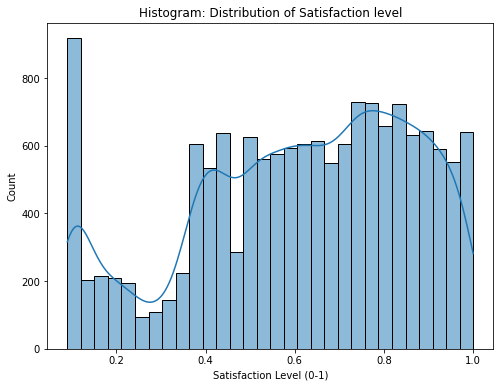

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(hr['satisfaction_level'], bins=30, kde=True)
plt.title('Histogram: Distribution of Satisfaction level')
plt.xlabel("Satisfaction Level (0-1)")
plt.show()

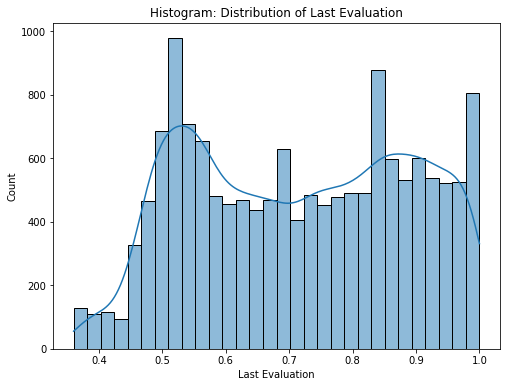

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(hr['last_evaluation'], bins=30, kde=True)
plt.title('Histogram: Distribution of Last Evaluation')
plt.xlabel('Last Evaluation')
plt.show()

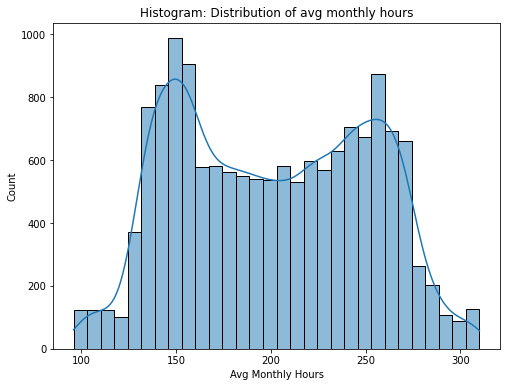

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(hr['average_montly_hours'], bins=30, kde=True)
plt.title('Histogram: Distribution of avg monthly hours')
plt.xlabel('Avg Monthly Hours')
plt.show()

We can observe that the data for each of the above mentioned columns is not normally distributed, this indicates the need to use standardisation for the features. Standardisation using StandardScaler() helps us in avoiding any negative impact on the performance of various ML algorithms when data is not normally distributed.

We will now visualize the number of employees who left and those who stayed across different salary groups and job descriptions. We will use bar plot as we are now dealing with categorical data.

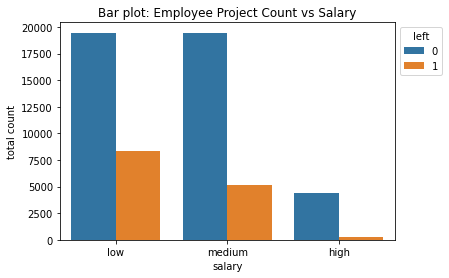

In [10]:
count_salary=sns.barplot(x='salary',y='number_project',data=hr, estimator= sum, hue='left',ci=None)
sns.move_legend(count_salary, "upper left", bbox_to_anchor=(1, 1))
plt.title('Bar plot: Employee Project Count vs Salary')
plt.ylabel('total count')
plt.show()

### Observations:

- We can see that across salary groups there are significantly more employees that stayed as compared to those who left.
- We can see that the number of employees who stayed remains similar in case of 'low' and 'medium' salary group. However there is a sharp decrease in that of 'high' salary group.
- On the other hand, the number of employees who left keeps decreasing as we move from low to high salary groups.

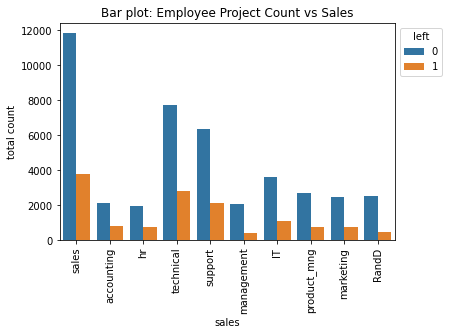

In [11]:
count_sales=sns.barplot(x='sales',y='number_project',data=hr, estimator= sum, hue='left',ci=None)
sns.move_legend(count_sales, "upper left", bbox_to_anchor=(1, 1))
plt.title('Bar plot: Employee Project Count vs Sales')
plt.ylabel('total count')
plt.xticks(rotation=90, ticks=np.arange(10))
plt.show()

### Observations:

- We can see that the the groups with larger number of employees also have the larger number of employees who stayed and left.Accordingly groups like Sales, Technical, Support and IT have larger number of employees who stayed and left both.

We will now perform clustering of the employee data by using the features of 'satisfaction_level' and 'last_evaluation'. In order to obtain employee clusters depending on these features. We will use conditional indexing in order to extract the values corresponding to those who left the company.

In [12]:
hr[['satisfaction_level','last_evaluation']]

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [13]:
hr_left=hr[hr['left']==1]
X=hr_left[['satisfaction_level','last_evaluation']]
X

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [14]:
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_clusters = 3, n_init = 20, init = 'k-means++', random_state = 42)
y_kmeans = model.fit_predict(X)
y_kmeans.shape

(3571,)

In [16]:
y_kmeans

array([0, 1, 2, ..., 0, 2, 0], dtype=int32)

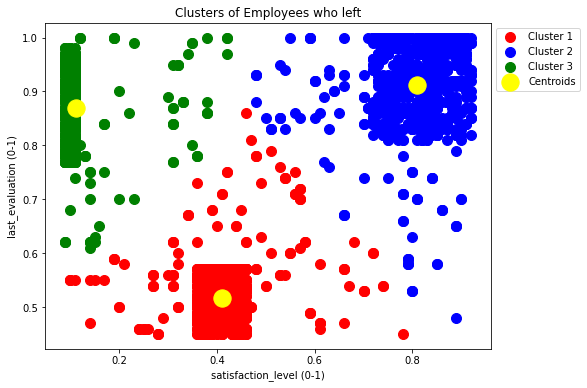

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[y_kmeans == 0,0], X.iloc[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1,0], X.iloc[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2,0], X.iloc[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Employees who left')
plt.xlabel('satisfaction_level (0-1)')
plt.ylabel('last_evaluation (0-1)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Observations: 

- We chose the hyperparameter of 3 clusters. We obtain clusters corresponding to high scores on last evaluation but low satisfaction level. 
- Another cluster is depicting low scores on last evaluation with moderate to low satisfaction level.
- The last one depicts those who both have high satisfaction level and high scores on last evaluation.

In [18]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


We will now encode the categorical data into numerical data by applying the `get_dummies` method of pandas dataframe. Notice the use of `drop_first=True` parameter. It ensures to remove the the first categorical variable in order to avoid multicollinearity and dummy variable trap.

In [19]:
cat=hr[['sales','salary']]
dummies=pd.get_dummies(cat, drop_first=True)
dummies

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0,1,0
14995,0,0,0,0,0,0,0,1,0,1,0
14996,0,0,0,0,0,0,0,1,0,1,0
14997,0,0,0,0,0,0,0,1,0,1,0


In [20]:
hr_new = pd.concat([hr, dummies], axis=1).drop(['sales', 'salary'], axis=1)
hr_new

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0


By using the `pd.concat()` method we have combined the existing numerical and encoded categorical data.

Let us look at the 'left' column to check the representation of classes.

In [21]:
left_class=hr_new['left'].value_counts()
left_class

0    11428
1     3571
Name: left, dtype: int64

Let us now visualize the representation of classes by using both bar graph and pie chart.

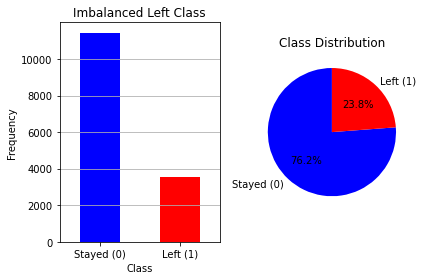

In [22]:
plt.subplot(1, 2, 1)
left_class.plot(kind='bar', color=['blue', 'red'])
plt.title('Imbalanced Left Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Stayed (0)', 'Left (1)'], rotation=0)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
left_class.plot(kind='pie', labels=['Stayed (0)', 'Left (1)'], colors=['blue', 'red'], autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

We can observe that data is imbalanced as the 'Stayed(0)' class is overrepresented. We will now utilise the SMOTE technique to balance the data.

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [24]:
#train&test
X=hr_new.drop('left', axis=1)
y=hr_new['left']

In [25]:
#splitting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#applying standardisation
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [26]:
y_train.value_counts()

0    9137
1    2862
Name: left, dtype: int64

These are the values before balancing of dataset.

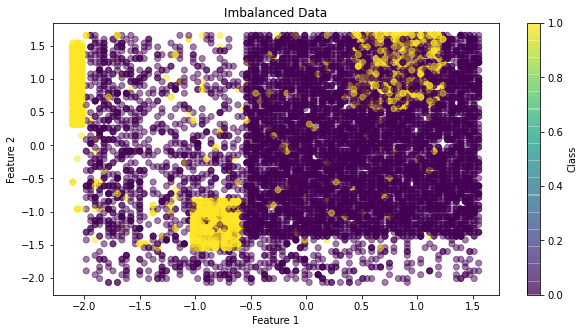

In [27]:
#Scatter plot to visualize imbalanced data
plt.figure(figsize=(10, 5))
plt.scatter(X_train_sc[:, 0], X_train_sc[:, 1], c=y_train, alpha=0.5, cmap='viridis', marker='o')
plt.title('Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')

One canobserve the yellow dots represent the minority class.

In [28]:
#apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sc, y_train)

In [29]:
y_train_smote.value_counts()

1    9137
0    9137
Name: left, dtype: int64

The training set is now balanced.

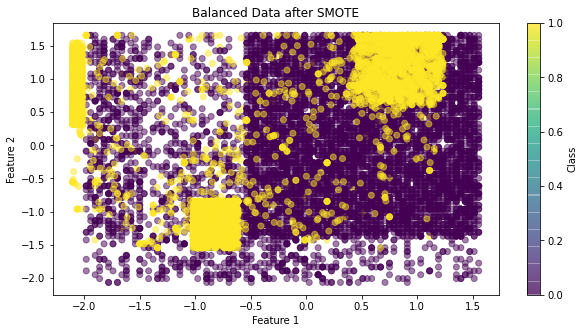

In [30]:
#plot balanced data
plt.figure(figsize=(10, 5))
plt.scatter(X_train_smote[:, 0], X_train_smote[:, 1], c=y_train_smote, alpha=0.5, cmap="viridis", marker='o')
plt.title('Balanced Data after SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')

We will now use K-Fold validation to evaluate performance of models to be used. 

In [31]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
X_scaler = scaler.fit_transform(X)

In [32]:
for train_index, test_index in kf.split(X_scaler,y):
    print(len(train_index), len(test_index))

11999 3000
11999 3000
11999 3000
11999 3000
12000 2999


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

In [34]:
#evaluate all models using K-fold
from numpy import mean
from numpy import std
log = LogisticRegression()
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
k_fold_scores_log = cross_val_score(log, X_train_smote, y_train_smote, scoring='accuracy', cv=kf, n_jobs=-1)
k_fold_scores_rf = cross_val_score(rf_model, X_train_smote, y_train_smote, scoring='accuracy', cv=kf, n_jobs=-1)
k_fold_scores_gb = cross_val_score(gb_model, X_train_smote, y_train_smote, scoring='accuracy', cv=kf, n_jobs=-1)
print("\t\tLogistic Regression Accuracy:")
print('Accuracy: %.3f ,\nStandard Deviations :%.3f' %
      (mean(k_fold_scores_log), std(k_fold_scores_log)))
print("\t\tRandom Forrest Accuracy:")
print('Accuracy: %.3f ,\nStandard Deviations :%.3f' %
      (mean(k_fold_scores_rf), std(k_fold_scores_rf)))
print("\t\tGradient Boosting Accuracy:")
print('Accuracy: %.3f ,\nStandard Deviations :%.3f' %
      (mean(k_fold_scores_gb), std(k_fold_scores_gb)))

		Logistic Regression Accuracy:
Accuracy: 0.776 ,
Standard Deviations :0.005
		Random Forrest Accuracy:
Accuracy: 0.989 ,
Standard Deviations :0.001
		Gradient Boosting Accuracy:
Accuracy: 0.967 ,
Standard Deviations :0.003


Since, we have a classification problem we have used `scoring='accuracy'`. We observe that Random Forrest Classifier gives the highest accuracy score.

Confusion Matrix:
[[1706  585]
 [ 141  568]]


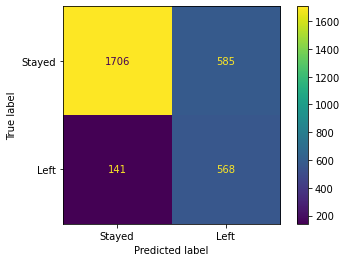

In [35]:
log.fit(X_train_smote, y_train_smote)
# Predict on the training and testing set
y_pred_train_log_reg = log.predict(X_train_smote)
y_pred_test_log_reg = log.predict(X_test_sc)
# Predict probabilities on the testing set
y_pred_test_prob_log_reg = log.predict_proba(X_test_sc)[:, 1]

conf_matrix_log = confusion_matrix(y_test, y_pred_test_log_reg)
print("Confusion Matrix:")
print(conf_matrix_log)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_log, display_labels = ["Stayed", "Left"])
cm_display.plot()
plt.show()

In [36]:
#Classification report for Logistic Regression
print("\t\tLogistic Regression Classification Report:")
print("\t\t-----------------------------------------")
print(classification_report(y_test, y_pred_test_log_reg))

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      2291
           1       0.49      0.80      0.61       709

    accuracy                           0.76      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.82      0.76      0.77      3000



Optimal Threshold: 0.4912


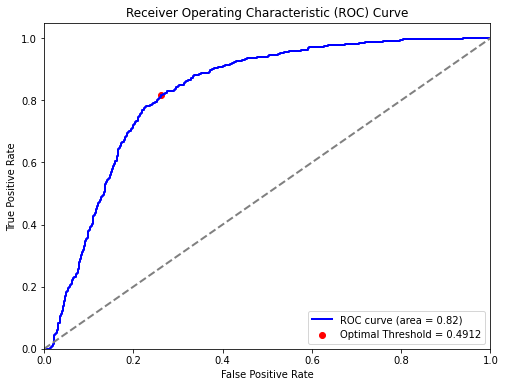

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob_log_reg)

roc_auc = auc(fpr, tpr)

youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix:
[[2278   13]
 [  17  692]]


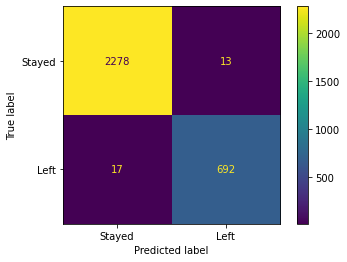

In [38]:
rf_model.fit(X_train_smote, y_train_smote)
# Predict on the training and testing set
y_pred_train_rf = rf_model.predict(X_train_smote)
y_pred_test_rf = rf_model.predict(X_test_sc)
# Predict probabilities on the testing set
y_pred_test_prob_rf = rf_model.predict_proba(X_test_sc)[:, 1]

conf_matrix_rf = confusion_matrix(y_test, y_pred_test_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_rf, display_labels = ["Stayed", "Left"])
cm_display.plot()
plt.show()

In [39]:
#Classification report for Random Forrest
print("\t\tRandom Forrest Classification Report:")
print("\t\t-----------------------------------------")
print(classification_report(y_test, y_pred_test_rf))

		Random Forrest Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2291
           1       0.98      0.98      0.98       709

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



Optimal Threshold: 0.4900


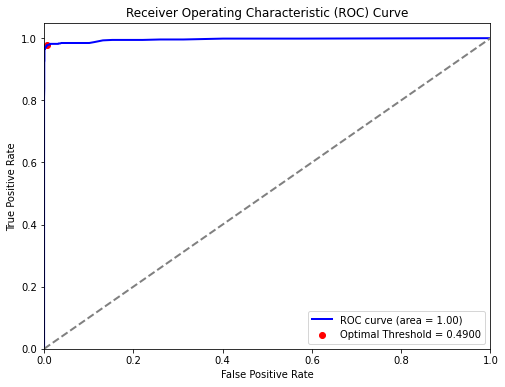

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob_rf)
roc_auc = auc(fpr, tpr)

youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix:
[[2234   57]
 [  45  664]]


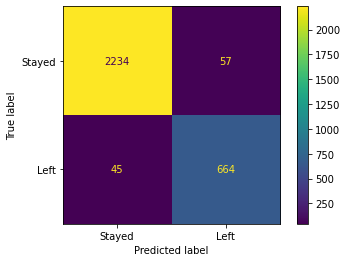

In [41]:
gb_model.fit(X_train_smote, y_train_smote)
# Predict on the training and testing set
y_pred_train_gb = gb_model.predict(X_train_smote)
y_pred_test_gb = gb_model.predict(X_test_sc)
# Predict probabilities on the testing set
y_pred_test_prob_gb = gb_model.predict_proba(X_test_sc)[:, 1]

conf_matrix_gb = confusion_matrix(y_test, y_pred_test_gb)
print("Confusion Matrix:")
print(conf_matrix_gb)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_gb, display_labels = ["Stayed", "Left"])
cm_display.plot()
plt.show()

In [42]:
#Classification report for Gradient Boosting
print("\t\tGradient Boosting Classification Report:")
print("\t\t-----------------------------------------")
print(classification_report(y_test, y_pred_test_gb))

		Gradient Boosting Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2291
           1       0.92      0.94      0.93       709

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000



Optimal Threshold: 0.7293


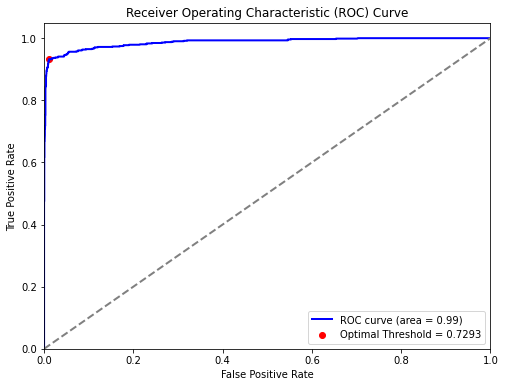

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob_gb)
roc_auc = auc(fpr, tpr)

youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Observations:

- We notice that in the classification reports, we get Random Forrest Classifier with the highest accuracy score
- Random Forrest Classifier also has the highest ROC-AUC score i.e. area under the curve is 1.
- Random Forrest Classifier also  has the least instances of False positives and False Negatives.
- Since, we are focussed on employee retention, we would like to avoid cases where the model predicts that the employee will stay but they actually leave, so false negatives are more important. Thus we must use Recall over Precision from the confusion matrix.

We will now use Random Forrest Classifier to get prediction probabilties on the test data. 

In [44]:
actual = y_test
pred = y_pred_test_rf
pred_prob = y_pred_test_prob_rf*100
df = pd.DataFrame(zip(y_test, pred, pred_prob), columns=['Actual','Prediction', 'Prediction Probability (%)'])
df

,Actual,Prediction,Prediction Probability (%)
0,0,0,2.0
1,0,0,1.0
2,0,0,0.0
3,0,0,20.0
4,0,0,3.0
...,...,...,...
2995,1,1,99.0
2996,0,0,0.0
2997,1,1,100.0
2998,0,0,0.0


We will select those entries which have been predicted to leave the company.

In [45]:
df_left = df[df['Prediction'] == 1]
df_left

,Actual,Prediction,Prediction Probability (%)
6,1,1,100.0
7,1,1,100.0
15,1,1,100.0
17,1,1,100.0
25,1,1,75.0
...,...,...,...
2973,1,1,97.0
2986,1,1,72.0
2993,1,1,98.0
2995,1,1,99.0


In [46]:
df_left.sort_values(by='Prediction Probability (%)')

,Actual,Prediction,Prediction Probability (%)
90,0,1,53.0
2850,1,1,54.0
1793,0,1,54.0
771,1,1,54.0
371,1,1,56.0
...,...,...,...
1284,1,1,100.0
1286,1,1,100.0
1297,1,1,100.0
1251,1,1,100.0


From the sorted list above we find that there are no employees in the safe zone.

In [47]:
low = df_left[df_left['Prediction Probability (%)']<=60]
low

,Actual,Prediction,Prediction Probability (%)
90,0,1,53.0
371,1,1,56.0
587,0,1,60.0
771,1,1,54.0
1557,0,1,57.0
1793,0,1,54.0
2220,1,1,60.0
2725,0,1,58.0
2850,1,1,54.0
2959,0,1,56.0


In [48]:
medium = df_left[(60<df_left['Prediction Probability (%)']) & (df_left['Prediction Probability (%)']<90)]
medium

,Actual,Prediction,Prediction Probability (%)
25,1,1,75.0
126,1,1,88.0
143,1,1,70.0
160,1,1,77.0
170,1,1,61.0
246,1,1,87.0
264,1,1,85.0
277,1,1,86.0
300,1,1,75.0
314,1,1,70.0


In [49]:
medium.shape

(40, 3)

In [50]:
high = df_left[df_left['Prediction Probability (%)']>=90]
high

,Actual,Prediction,Prediction Probability (%)
6,1,1,100.0
7,1,1,100.0
15,1,1,100.0
17,1,1,100.0
27,1,1,100.0
...,...,...,...
2972,1,1,100.0
2973,1,1,97.0
2993,1,1,98.0
2995,1,1,99.0


In [51]:
655/705*100

92.90780141843972

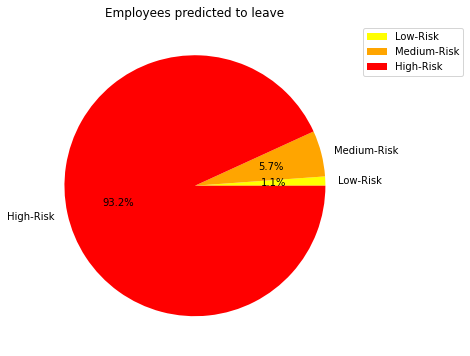

In [60]:
no = [8, 40, 655]
zone = ['Low-Risk', 'Medium-Risk', 'High-Risk']
colors= ['yellow', 'orange', 'red']
plt.figure(figsize=(8, 6))
plt.pie(no, labels= zone,autopct='%1.1f%%', colors=colors)
plt.title('Employees predicted to leave')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



There are 8, 40 and 655 employees in the Low-Risk, Medium-Risk and High-Risk zones respectively, we find that out of the employees predicted to leave the company, the overwhelming majority (92.3%) lie in the High-Risk Zone.  